#<a id="Some_examples_on_how_to_use_SPIKE."> Some examples on how to use SPIKE.</a>

* simple import of native dataset.

* simple FID handling, processing and display

* FFT with zerofilling

* urQRd : noise-reduction

You have first to execute the first two cells, then you can execute independently any of the example cells. 
We begin first with simple import then we show how to make more elaborated commands involving data treatment algorithms such as urQRd.

In [1]:
%matplotlib inline

In [2]:
cd ../.. 

/Users/chiron/bitbuck


In [3]:
# load scientific environment
import spike.Orbitrap as O                 # loads the whole NPKV2 environment, tuned to Orbitrap
from spike.File.Thermo import Import_1D    # adds the Thermofisher importer


          SPIKE
    Version     : 0.6.4
    Date        : 12-03-2015
Importing plugin << bcorr >>
Importing plugin << fastclean >>
Importing plugin << Peaks >>
Importing plugin << rem_ridge >>
Importing plugin << sg >>
Importing plugin << test >>
Importing plugin << urQRd >>


##<a class="links" id="Some_examples_on_how_to_use_SPIKE._Import_Orbitrap_DATA"> Import Orbitrap DATA</a>

You enter the filename, then the command `Import_1D()` loads it into memory

the data is put into a python variable, that you can handle freely

In [4]:
#put your filename here
filename = "DATA_test/ubiquitin_5_scan_res_30000_1.dat"
o = Import_1D(filename)
print o

MIDAS Data File v3.0



1048576
Dim 1
Axis F1 : Orbitrap axis at 1365.333333 kHz,  1048576 real points,  from mz = 10000.000   to m/z =   25.485  M/DeltaM (M=400) = 132337


##<a class="links" id="Some_examples_on_how_to_use_SPIKE._Show_FID">  Show FID</a>

Then you can apply action to the data by the appending the method name to the variable.
The methods may have parameters

For instance displaying,
You can zoom in, and move around with the graphical tools
You can also store picture files (png, pdf, etc..)

Dim 1
Axis F1 : Orbitrap axis at 1365.333333 kHz,  1048576 real points,  from mz = 10000.000   to m/z =   25.485  M/DeltaM (M=400) = 132337

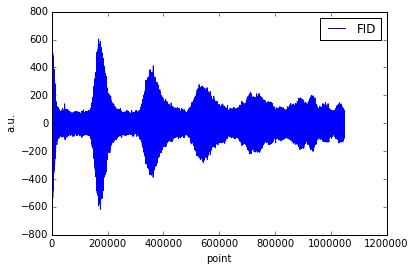

In [5]:
o.display(label = "FID")

##<a class="links" id="Some_examples_on_how_to_use_SPIKE._FFT_with_zerofilling"> FFT with zerofilling</a>

methods are applied in sequence on the data, modifying its content, this is call a pipe.

`apod_sin(maxi = 0.5)` corresponds to a sine-bell apodisation, with its maxium midway in the FID. (aka Hammng window)

Dim 1
Axis F1 : Orbitrap axis at 1365.333333 kHz,  1048576 real points,  from mz = 10000.000   to m/z =   25.485  M/DeltaM (M=400) = 132337


Dim 1
Axis F1 : Orbitrap axis at 1365.333333 kHz,  1048576 real points,  from mz = 10000.000   to m/z =   25.485  M/DeltaM (M=400) = 132337

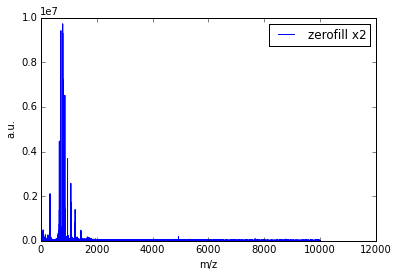

In [6]:
print o
o.apod_sin(maxi = 0.5).chsize(o.buffer.size*2).rfft().modulus()
o.units = 'm/z'
o.display(label = "zerofill x2")

### FFT with zerofilling, processing cutting the pipes.

this is strictly equivalent

MIDAS Data File v3.0



1048576


Dim 1
Axis F1 : Orbitrap axis at 1365.333333 kHz,  2097152 real points,  from mz = 10000.000   to m/z =   25.485  M/DeltaM (M=400) = 264674

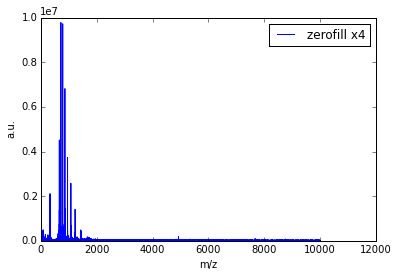

In [7]:
# here, we have to reload it again !
o = Import_1D(filename)
o.units = 'm/z'
o.apod_sin(maxi = 0.5)
o.chsize(o.buffer.size*4)
o.rfft()
o.modulus().display(label = "zerofill x4")

##<a class="links" id="Some_examples_on_how_to_use_SPIKE._urQRd"> urQRd</a>

is a preprocessing technique, used for reducing the noise

The parameter $k$ given to urQRd is related to the number of expected lines in the spectrum. 
It should be chosen 2 to 3 times larger than this expected number.

Be carefull than the processing time **and** the memory footprint are both proportionnal to this value.

MIDAS Data File v3.0



1048576


Dim 1
Axis F1 : Orbitrap axis at 1365.333333 kHz,  524288 real points,  from mz = 10000.000   to m/z =   25.485  M/DeltaM (M=400) = 66168

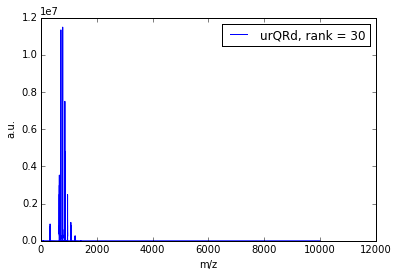

In [8]:
o = Import_1D("DATA_test/ubiquitin_5_scan_res_30000_1.dat")
o.report()
o.units = 'm/z'
rank = 30
o.urqrd(k = rank).rfft().modulus().display(label = "urQRd, rank = {}".format(rank))

##<a class="links" id="Some_examples_on_how_to_use_SPIKE._Additional_tricks"> Additional tricks</a>

### ipython short cuts

there are *many* shortcuts and tricks in IPython, read the doc !

a couple of them are really helpful for MS processing
* you can execute a cell by hitting `shift-return`
* you can get the documentation of any function by adding a ? at the end of its name, eg `o.rfft?`
* you can get all possible values by hitting the `<TAB>` key. Try for instance typing `o. <TAB>`

### SPIKE arcanes

If needed, you can directly manipulate the numeric data held into the SPIKE dataset, 
the `.get_buffer()` method returns the underlying `numpy` array.
The `.set_buffer()` method sets it, data can be real or complex.
Do `.adapt_size()` afterwards if you changed the number of points.

MIDAS Data File v3.0



1048576


Dim 1
Axis F1 : Orbitrap axis at 1365.333333 kHz,  262144 real points,  from mz = 10000.000   to m/z =   25.485  M/DeltaM (M=400) = 33084

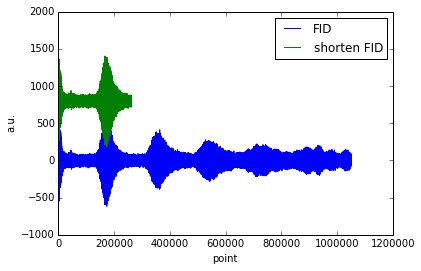

In [9]:
o = Import_1D(filename)
oo = o.copy()
oo.chsize(len(o.buffer)/4)          # shorten the FID
oo.set_buffer( oo.get_buffer()+800 )   # this adds a value to the data, just for display purpose
oo.adapt_size()
o.display(label = "FID")
oo.display(label = "shorten FID", new_fig = False)